Trainset: 1000
input shape:  torch.Size([1, 3, 256, 256])
label2 shape:  torch.Size([1, 2, 256, 256])


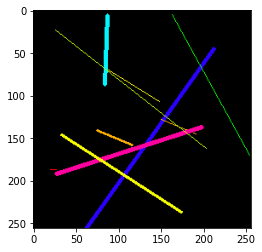

In [1]:
import sys
sys.path.append('../')

from helpers import helper


import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
])

class TrainingDatasets(Dataset):
    def __init__(self, Images, Labels, Transform):
        self.fnames = Images
        self.transform = Transform
        self.labels = Labels         
        
    def __len__(self):
        return len(self.fnames)

    # Returns the tensor image and corresponding label in a tuple
    def __getitem__(self, index):       
        # read image and convert to RGB
        image = cv2.imread(self.fnames[index])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # read label and convert to HSV, then to label_xy
        label = cv2.imread(self.labels[index])
        label = cv2.cvtColor(label, cv2.COLOR_BGR2HSV)
        label_xy = helper.convertHSVtoXY(label).astype(np.float32)

        return self.transform(image), self.transform(label_xy)

# return dataset and dataloader    
def getData(path_to_csv, batch_size=1):
    df = pd.read_csv(path_to_csv)
    images = df['input_path'].values
    labels = df['label_path'].values
    dataset = TrainingDatasets(images, labels, transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataset, dataloader


if __name__ == '__main__':
    trainset, train_dl = getData('../../datasets/train.csv', batch_size=1)
    print('Trainset:', len(trainset))
    for images, labels in train_dl:
        print('input shape: ', images.shape)
        print('label2 shape: ', labels.shape)
        break

    label_HSV = helper.convertXYtoHSV(labels[0].permute(1,2,0).numpy())
    plt.imshow(cv2.cvtColor(label_HSV, cv2.COLOR_HSV2RGB))     
        